
Neural network - 5-Fold data -  relu  activation function

MAE: 0.08
MSE: 0.01

MAE: 0.16
MSE: 0.04

MAE: 1.84
MSE: 5.41


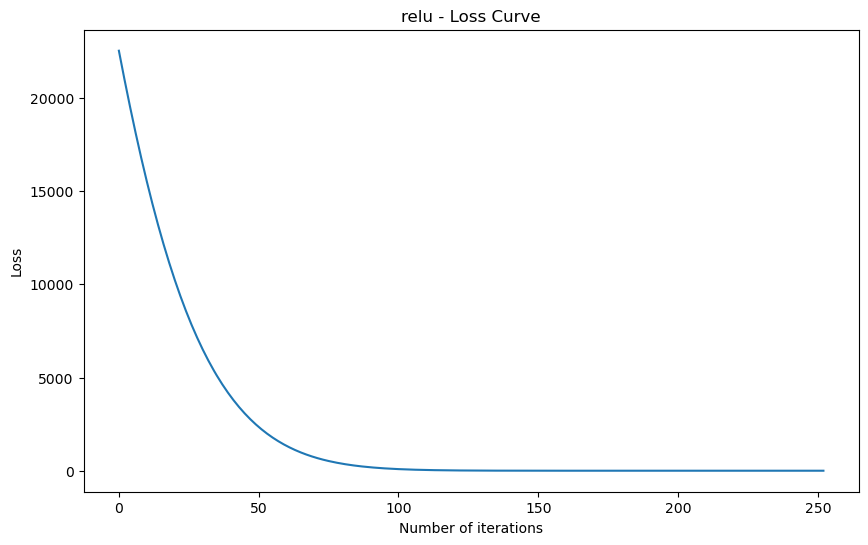


Average MSE =  1.8200063042947086

Neural network - 5-Fold data -  identity  activation function

MAE: 1.28
MSE: 2.59

MAE: 0.16
MSE: 0.04

MAE: 0.43
MSE: 0.30


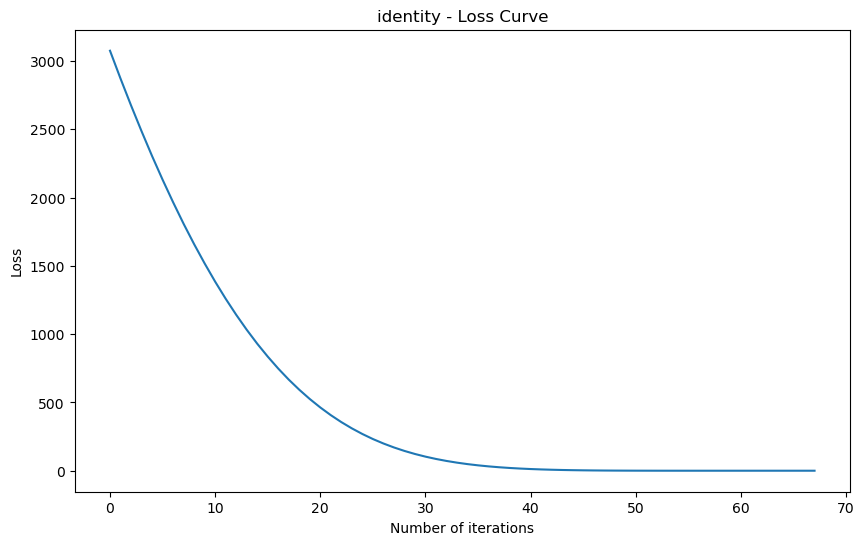


Average MSE =  2.794413530797225

Neural network - 5-Fold data -  tanh  activation function

MAE: 0.40
MSE: 0.18

MAE: 0.12
MSE: 0.02

MAE: 0.14
MSE: 0.03


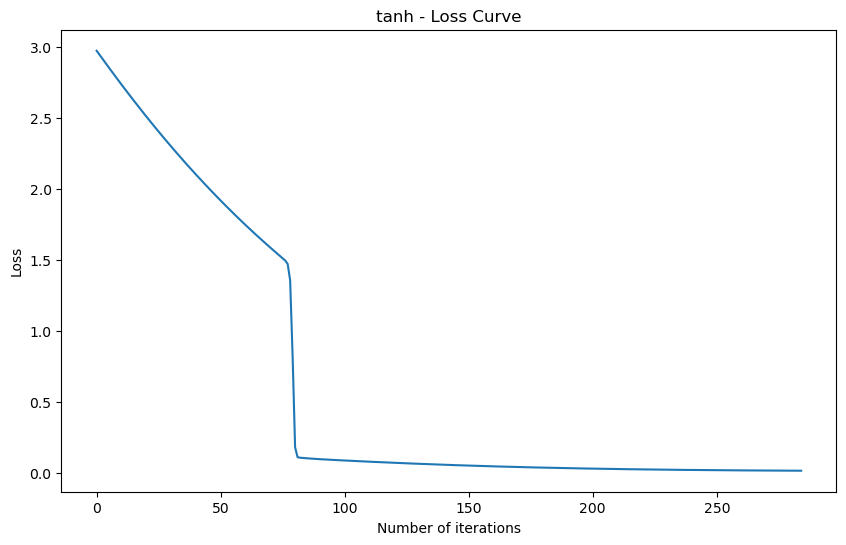


Average MSE =  2.8728001559247645

Neural network - 5-Fold data -  logistic  activation function

MAE: 0.17
MSE: 0.04

MAE: 0.12
MSE: 0.02

MAE: 0.12
MSE: 0.02


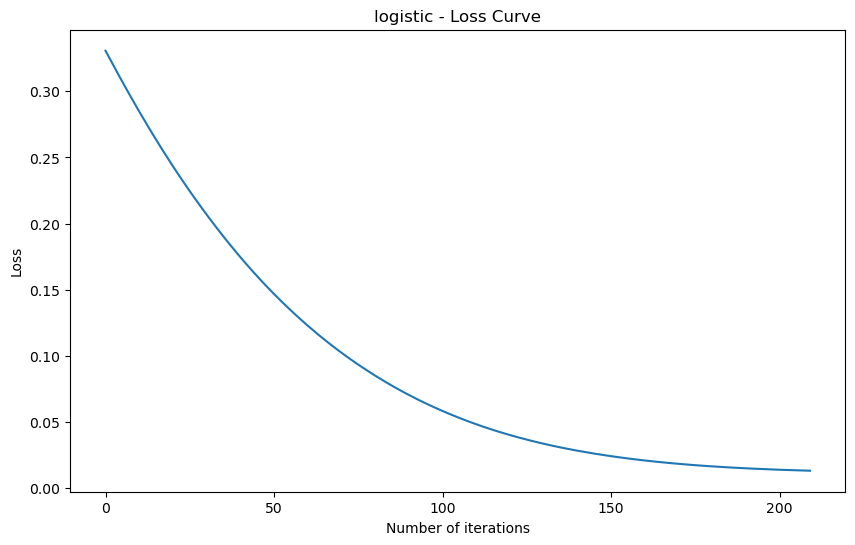


Average MSE =  2.89974000452869


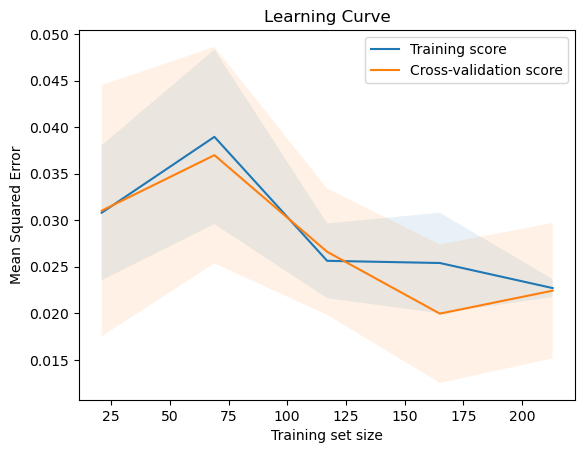

['relu', 'identity', 'tanh', 'logistic']
[1.8200063042947086, 2.794413530797225, 2.8728001559247645, 2.89974000452869]


In [54]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.inspection import permutation_importance

def neural_network_skl():

    data = pd.read_csv('/Users/saiharshithtanguturi/Desktop/Workspacepython/Project/adm_data.csv')

    k = 3
    kf = KFold(n_splits=k, shuffle=True)
    mse_scores=[]
    mae_scores=[]
    avg_mae=[]
    avg_mse=[]
    act_fun=['relu','identity','tanh','logistic']
    for act in act_fun:
        print()
        print("Neural network - 5-Fold data - ",act," activation function")
        for train_index, test_index in kf.split(data):

            print()
            train_data = data.iloc[train_index]
            test_data = data.iloc[test_index]

            X_train = train_data.iloc[:, :-1].values
            Y_train = train_data.iloc[:, -1].values.ravel()
            X_test = test_data.iloc[:, :-1].values
            Y_test = test_data.iloc[:, -1].values.ravel()

            nn = MLPRegressor(hidden_layer_sizes=(4,), activation = act, solver='adam', max_iter=10000)

            nn.fit(X_train, Y_train)

            y_pred = nn.predict(X_test)

            mae = mean_absolute_error(Y_test, y_pred)

            mse = mean_squared_error(Y_test, y_pred)

            mse_scores.append(mse)
            mae_scores.append(mae)

            print(f"MAE: {mae:.2f}")
            print(f"MSE: {mse:.2f}")

        # Plot loss curve
        plt.figure(figsize=(10,6))
        plt.plot(nn.loss_curve_)
        plt.title(f"{act} - Loss Curve")
        plt.xlabel('Number of iterations')
        plt.ylabel('Loss')
        plt.show()

        print()

        print("Average MSE = ",sum(mse_scores)/k)
        avg_mse.append(sum(mse_scores)/k)
        
        
    
    # create the learning curve
    train_sizes, train_scores, test_scores = learning_curve(nn, X_train, Y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    # convert the negative mean squared errors to positive mean squared errors
    train_scores = -train_scores
    test_scores = -test_scores

    # calculate the mean and standard deviation of the training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # plot the learning curve
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')

    # plot the error bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    # add labels and legend
    plt.xlabel('Training set size')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend(loc='best')

    plt.show()
    print(act_fun)
    print(avg_mse)
    
    


    
#    
neural_network_skl()
